In [41]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Data Examinaton

In [42]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline 

print('Training data shape : ',train_X.shape, train_Y.shape)
print('Testing data shape  : ',test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape  :  (10000, 28, 28) (10000,)


In [43]:
# Find unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ',classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 1')

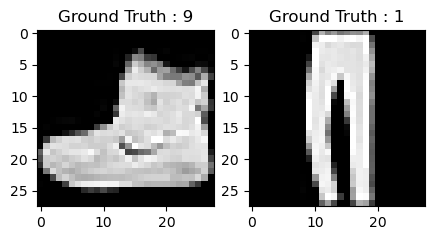

In [44]:
plt.figure(figsize=[5,5])

#Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#Display the third image in test data
plt.subplot(122)
plt.imshow(test_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[2]))

## Data preprocessing

In [45]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [46]:
# convert to float and rescale 0-255 to 0-1
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X = train_X/255.
test_X=test_X/255.


In [47]:
#change labels from categorical to one-hot encoding
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print("Original label : ",train_Y[0])
print("After conversion to one-hot : ",train_Y_one_hot[0])

Original label :  9
After conversion to one-hot :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [48]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X,train_Y_one_hot,test_size=0.2, random_state=13)

In [49]:
train_X.shape,valid_X.shape,train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Model the data

In [50]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU


In [51]:
batch_size = 64
epochs = 20
num_classes = 10


In [52]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [53]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [54]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                

In [55]:
fashion_train = fashion_model.fit(train_X,train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 20s 26ms/step - loss: 0.4609 - accuracy: 0.8323 - val_loss: 0.3310 - val_accuracy: 0.8799
Epoch 2/20
750/750 [==============================] - 19s 26ms/step - loss: 0.2909 - accuracy: 0.8931 - val_loss: 0.2818 - val_accuracy: 0.8982
Epoch 3/20
750/750 [==============================] - 19s 26ms/step - loss: 0.2467 - accuracy: 0.9090 - val_loss: 0.2765 - val_accuracy: 0.8992
Epoch 4/20
750/750 [==============================] - 20s 26ms/step - loss: 0.2121 - accuracy: 0.9216 - val_loss: 0.2662 - val_accuracy: 0.9036
Epoch 5/20
750/750 [==============================] - 19s 25ms/step - loss: 0.1866 - accuracy: 0.9302 - val_loss: 0.2417 - val_accuracy: 0.9149
Epoch 6/20
750/750 [==============================] - 19s 25ms/step - loss: 0.1652 - accuracy: 0.9388 - val_loss: 0.2398 - val_accuracy: 0.9163
Epoch 7/20
750/750 [==============================] - 19s 25ms/step - loss: 0.1464 - accuracy: 0.9451 - val_loss: 0.2346 - val_accuracy:

In [56]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot,verbose=0)

In [57]:
print("Test loss = ",test_eval[0])
print("Test accuracy = ",test_eval[1])

Test loss =  0.4703960418701172
Test accuracy =  0.9172000288963318


<Figure size 640x480 with 0 Axes>

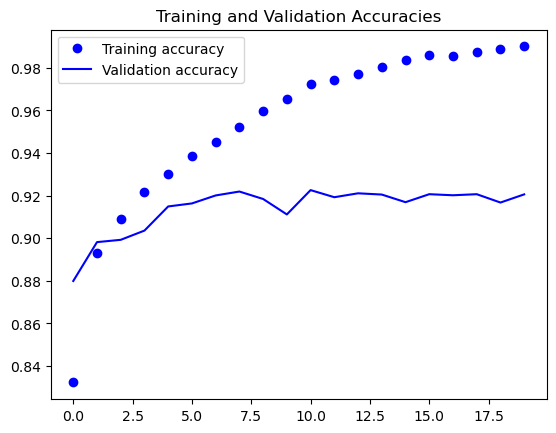

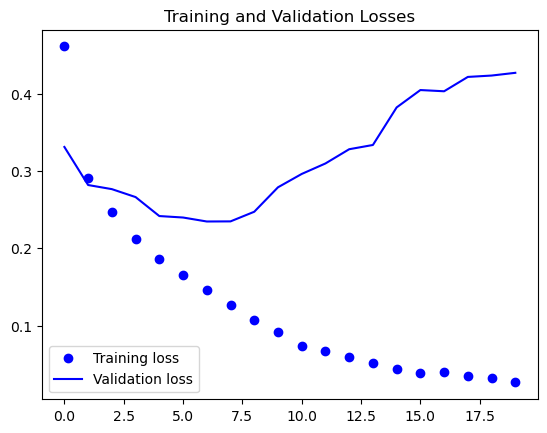

<Figure size 640x480 with 0 Axes>

In [58]:
#Visualize results
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.figure()

## Create model with dropout

In [59]:
batch_size = 64
epochs = 20
num_classes = 10

In [60]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#dropout
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
#dropout
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [61]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [62]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [63]:
fashion_train_dropout = fashion_model.fit(train_X,train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 24s 32ms/step - loss: 0.6099 - accuracy: 0.7728 - val_loss: 0.3648 - val_accuracy: 0.8655
Epoch 2/20
750/750 [==============================] - 22s 29ms/step - loss: 0.3713 - accuracy: 0.8631 - val_loss: 0.3011 - val_accuracy: 0.8915
Epoch 3/20
750/750 [==============================] - 22s 29ms/step - loss: 0.3244 - accuracy: 0.8807 - val_loss: 0.2962 - val_accuracy: 0.8878
Epoch 4/20
750/750 [==============================] - 22s 29ms/step - loss: 0.2991 - accuracy: 0.8900 - val_loss: 0.2572 - val_accuracy: 0.9067
Epoch 5/20
750/750 [==============================] - 22s 29ms/step - loss: 0.2791 - accuracy: 0.8980 - val_loss: 0.2639 - val_accuracy: 0.9007
Epoch 6/20
750/750 [==============================] - 22s 29ms/step - loss: 0.2661 - accuracy: 0.9001 - val_loss: 0.2348 - val_accuracy: 0.9131
Epoch 7/20
750/750 [==============================] - 22s 29ms/step - loss: 0.2533 - accuracy: 0.9045 - val_loss: 0.2295 - val_accuracy:

In [64]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [65]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot,verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.2211 - accuracy: 0.9197


In [66]:
print("Test loss = ",test_eval[0])
print("Test accuracy = ",test_eval[1])

Test loss =  0.221077099442482
Test accuracy =  0.919700026512146


<Figure size 640x480 with 0 Axes>

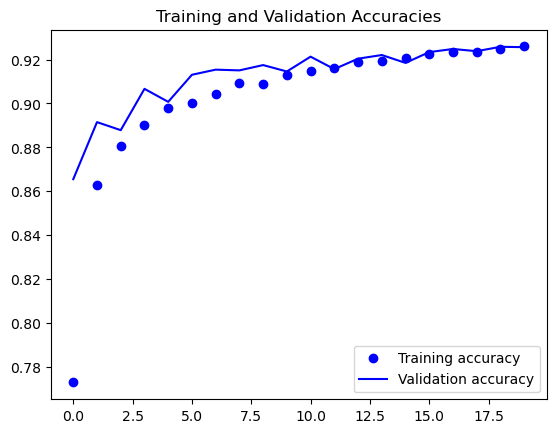

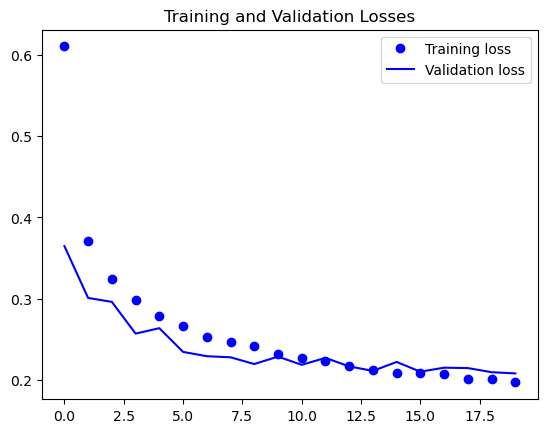

<Figure size 640x480 with 0 Axes>

In [67]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.figure()

In [68]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [69]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [70]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9160 correct labels


/tmp/ipykernel_4217/4241853884.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4217/4241853884.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


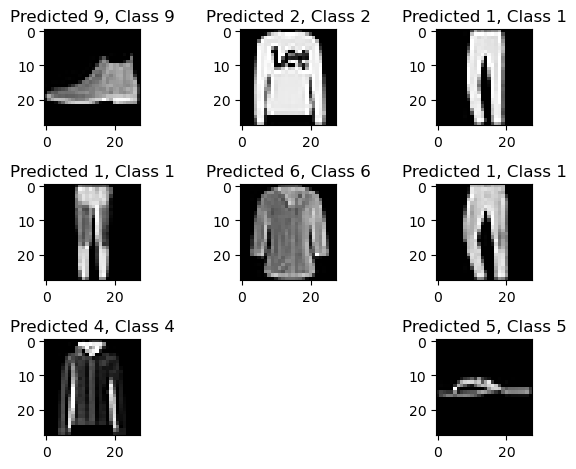

In [71]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" %len(correct))
for i,correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],test_Y[correct]))
    plt.tight_layout()

Found 840 incorrect labels


/tmp/ipykernel_4217/3887955676.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4217/3887955676.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


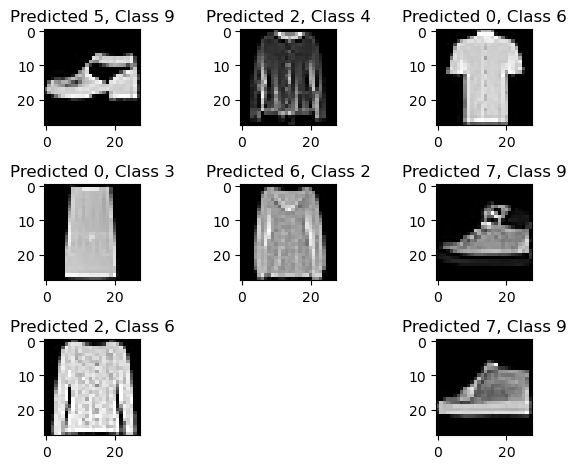

In [72]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" %len(incorrect))
for i,incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect],test_Y[incorrect]))
    plt.tight_layout()

In [73]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y,predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.91      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.90      0.88      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.85      0.68      0.75      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

